<a href="https://colab.research.google.com/github/luthfinurmawan/nd064_course_1/blob/main/Team1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

## 1.1 Data Download & Preparation

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from scipy import stats
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
# Load the dataset
url = "https://drive.google.com/file/d/1INUiQjz8uD-LAaP2h6qW5BCyezSXzK0w/view?usp=drive_link"
output = 'salary_data.csv'
gdown.download(url, output, quiet=False, fuzzy=True)
df_salary = pd.read_csv('/content/salary_data.csv')
df_salary

Downloading...
From: https://drive.google.com/uc?id=1INUiQjz8uD-LAaP2h6qW5BCyezSXzK0w
To: /content/salary_data.csv
100%|██████████| 348k/348k [00:00<00:00, 4.67MB/s]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
df_salary.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## 1.2 Data cleanning & EDA

In [ ]:
df_salary.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [ ]:
#fix column naming
df_salary.rename(columns={'Years of Experience':'Years_of_Experience'}, inplace = True)
df_salary.rename(columns={'Job Title':'Job_Title'}, inplace = True)
df_salary.rename(columns={'Education Level':'Education_Level'}, inplace = True)

In [ ]:
#change data from category into numerical
# Gender: Female=0, Male=1, Other:2
# Education Level: high school:0, bachelor:1, master:2, phd:3
df_salary['gender'] = df_salary['Gender'].map({'Female':0, 'Male':1,'Other':2})
df_salary['edu'] = df_salary['Education_Level'].map({'High School':0, 'Bachelor\'s':1, 'Bachelor\'s Degree':1, 'Master\'s':2, 'Master\'s Degree':2, 'PhD':3, 'phD':3})

# remove null data
df_salary = df_salary.dropna(how='any')

#remove unwanted columns
# final_df = df_salary.loc[:,['Age','edu','Years_of_Experience','Salary']]
final_df = df_salary.drop(['Gender','Education_Level','Job_Title'], axis =1)
final_df.isnull().sum()

Age                    0
Years_of_Experience    0
Salary                 0
gender                 0
edu                    0
dtype: int64

<Axes: >

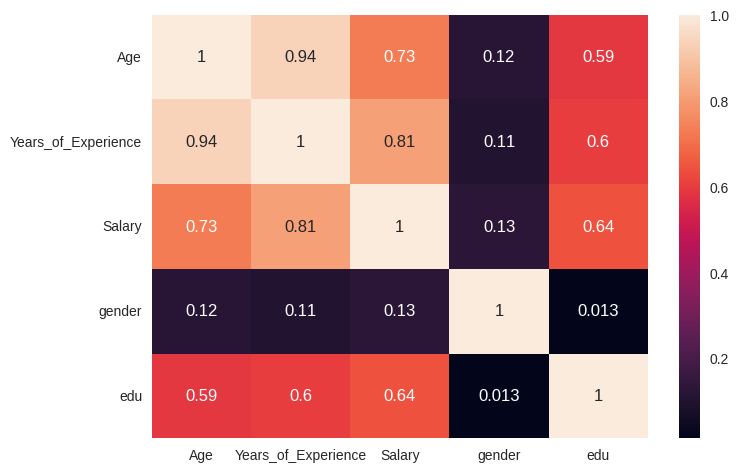

In [ ]:
#check variable correlation, higher number indicates high correlation
corr_Table = final_df.corr()
sns.heatmap(corr_Table,annot = True)

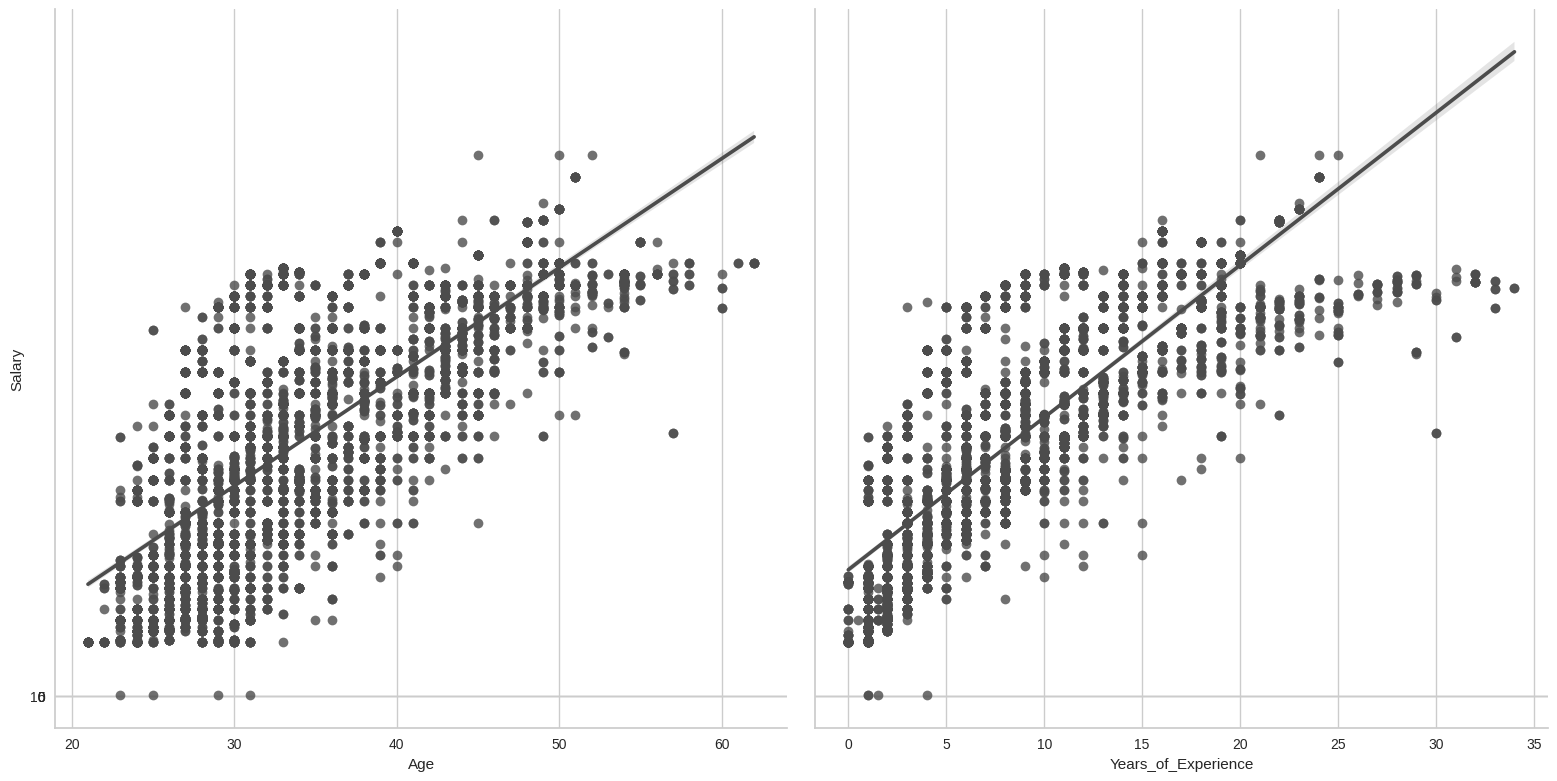

In [ ]:
# visualized the regression graph using EDA
# g = sns.PairGrid(final_df, y_vars=["Salary"], x_vars=final_df.columns, height= 8)
g = sns.PairGrid(final_df, y_vars=["Salary"], x_vars=['Age','Years_of_Experience'], height= 8)
g.map(sns.regplot, color=".3")
g.set(yticks=[0, 5, 10])

## 1.3 Data Splitting (Train & Test)

In [ ]:
# feature selection
# X = final_df.drop('Salary', axis=1)
X = final_df[['Years_of_Experience']]
y = final_df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Years_of_Experience
3426,10.0
1552,10.0
6021,12.0
4461,1.0
3286,1.0
...,...
3776,4.0
5195,14.0
5230,1.0
5395,1.0


In [ ]:
# final_df = df_salary.loc[:,['Age','edu','Years_of_Experience','Salary']]
final_df.isnull().sum()

Age                    0
Years_of_Experience    0
Salary                 0
gender                 0
edu                    0
dtype: int64

In [ ]:
non_numeric = final_df.select_dtypes(include=['object'])
all_non_numeric = non_numeric.notna().all(axis=1)  # Check for all non-numeric values in each row
print(final_df[all_non_numeric])

       Age  Years_of_Experience    Salary  gender  edu
0     32.0                  5.0   90000.0     1.0  1.0
1     28.0                  3.0   65000.0     0.0  2.0
2     45.0                 15.0  150000.0     1.0  3.0
3     36.0                  7.0   60000.0     0.0  1.0
4     52.0                 20.0  200000.0     1.0  2.0
...    ...                  ...       ...     ...  ...
6699  49.0                 20.0  200000.0     0.0  3.0
6700  32.0                  3.0   50000.0     1.0  0.0
6701  30.0                  4.0   55000.0     0.0  1.0
6702  46.0                 14.0  140000.0     1.0  2.0
6703  26.0                  1.0   35000.0     0.0  0.0

[6698 rows x 5 columns]


## 1.4 Data Standarization

In [ ]:
#Data scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler = RobustScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

## 1.5 Modeling

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pd.DataFrame(data = np.append(model.intercept_ , model.coef_),
             index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)

,Value
Years_of_Experience Coef.,0.707286
Intercept,-0.081042


## 1.6 Data Evaluation

In [ ]:
# run the model using test/unknown data
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)


#Evaluation metrics
mse = mean_squared_error(y_pred, y_test) #lower better
rmse = np.sqrt(mse) #lower better
r2 = r2_score(y_pred, y_test) # higher is better but usually 0.4 - 0.6 are the best to prevent overfitting
print(f'MSE:{mse}\nRMSE:{rmse}\nR2:{r2}')

coef = model.coef_
features = X.columns
print(f'Features:{features}')
print(f'LR Feature Coefficients:{coef}')

MSE:982050061.9154335
RMSE:31337.677991763103
R2:0.49321108579903195
Features:Index(['Years_of_Experience'], dtype='object')
LR Feature Coefficients:[[0.70728617]]


<Axes: xlabel='Years_of_Experience', ylabel='Salary'>

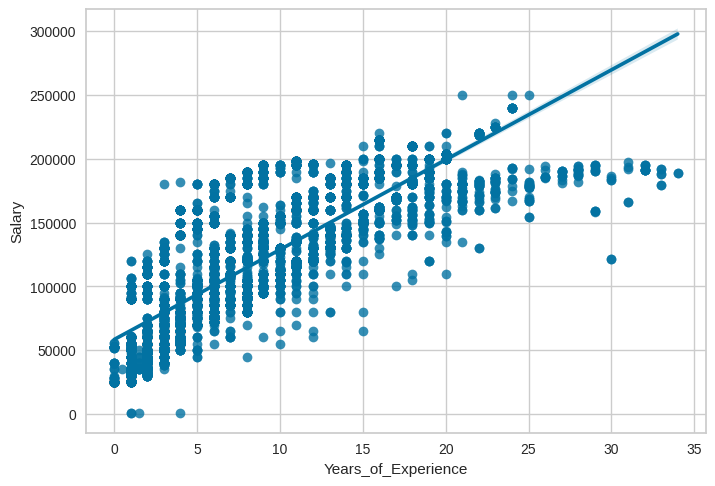

In [ ]:
sns.regplot(final_df, x = 'Years_of_Experience', y = 'Salary')

#Polynomial regression

since we are using the same data as above so we do not need to clean the data probably just simple regression plot EDA will be sufficient

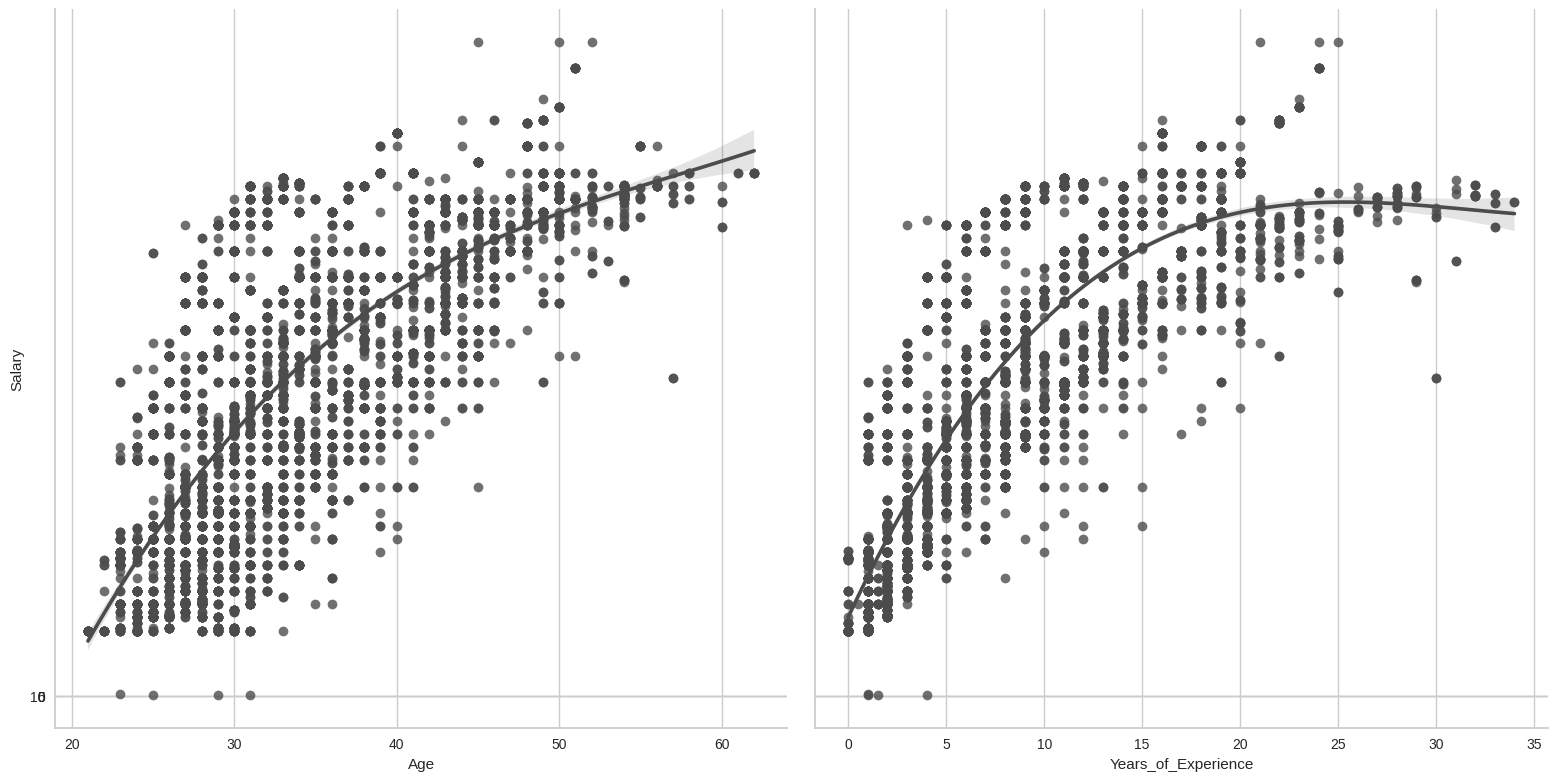

In [ ]:
# sns.regplot(final_df, x = final_df.columns(), y = 'Salary', order = 3)
g = sns.PairGrid(final_df, y_vars=["Salary"], x_vars=['Age','Years_of_Experience'], height= 8)
g.map(sns.regplot, color=".3", order= 3)
g.set(yticks=[0, 5, 10])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head(5)

,Years_of_Experience,Years_of_Experience^2,Years_of_Experience^3
0,5.0,25.0,125.0
1,3.0,9.0,27.0
2,15.0,225.0,3375.0
3,7.0,49.0,343.0
4,20.0,400.0,8000.0


In [ ]:
poly_features_names = poly_features.get_feature_names_out(X.columns)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_poly_train)

X_poly_train = scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(X_poly_train, columns=poly_features_names)

X_poly_test = scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(X_poly_test, columns=poly_features_names)

In [ ]:
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_poly_train, y_poly_train)

LinearRegression()

In [ ]:
y_poly_pred = polynomial_reg.predict(X_poly_test)

mse = mean_squared_error(y_poly_pred, y_poly_test) #lower better
rmse = np.sqrt(mse) #lower better
r2 = r2_score(y_poly_pred, y_poly_test) # higher is better but usually 0.4 - 0.6 are the best to prevent overfitting
print(f'MSE:{mse}\nRMSE:{rmse}\nR2:{r2}')

MSE:696537883.8479861
RMSE:26392.004165049424
R2:0.6631460622444869


#Multi Regression

In [ ]:
final_df.columns

Index(['Age', 'Years_of_Experience', 'Salary', 'gender', 'edu'], dtype='object')

In [ ]:
multi_X = final_df.drop('Salary', axis=1)
multi_y = final_df['Salary']
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(multi_X,multi_y,test_size=0.2,random_state=42)

In [ ]:
multi_X

,Age,Years_of_Experience,gender,edu
0,32.0,5.0,1.0,1.0
1,28.0,3.0,0.0,2.0
2,45.0,15.0,1.0,3.0
3,36.0,7.0,0.0,1.0
4,52.0,20.0,1.0,2.0
...,...,...,...,...
6699,49.0,20.0,0.0,3.0
6700,32.0,3.0,1.0,0.0
6701,30.0,4.0,0.0,1.0
6702,46.0,14.0,1.0,2.0


In [ ]:
multi_final_df = df_salary.loc[:,['Age','edu','Years_of_Experience','Salary']]
multi_final_df.isnull().sum()

Age                    0
edu                    0
Years_of_Experience    0
Salary                 0
dtype: int64

In [ ]:
non_numeric = multi_final_df.select_dtypes(include=['object'])
all_non_numeric = non_numeric.notna().all(axis=1)  # Check for all non-numeric values in each row
print(multi_final_df[all_non_numeric])

       Age  edu  Years_of_Experience    Salary
0     32.0  1.0                  5.0   90000.0
1     28.0  2.0                  3.0   65000.0
2     45.0  3.0                 15.0  150000.0
3     36.0  1.0                  7.0   60000.0
4     52.0  2.0                 20.0  200000.0
...    ...  ...                  ...       ...
6699  49.0  3.0                 20.0  200000.0
6700  32.0  0.0                  3.0   50000.0
6701  30.0  1.0                  4.0   55000.0
6702  46.0  2.0                 14.0  140000.0
6703  26.0  0.0                  1.0   35000.0

[6698 rows x 4 columns]


In [ ]:
scaler = RobustScaler()
X_multi_train = scaler.fit_transform(X_multi_train)
X_multi_test = scaler.transform(X_multi_test)

In [ ]:
scaler = RobustScaler()
y_multi_train = scaler.fit_transform(y_multi_train.values.reshape(-1,1))

In [ ]:
model = LinearRegression()
model.fit(X_multi_train, y_multi_train)

LinearRegression()

In [ ]:
# run the model using test/unknown data
y_multi_pred = model.predict(X_multi_test)
y_multi_pred = scaler.inverse_transform(y_multi_pred)


#Evaluation metrics
mse = mean_squared_error(y_multi_pred, y_multi_test) #lower better
rmse = np.sqrt(mse) #lower better
r2 = r2_score(y_multi_pred, y_multi_test) # higher is better but usually 0.4 - 0.6 are the best to prevent overfitting
print(f'MSE:{mse}\nRMSE:{rmse}\nR2:{r2}')

coef = model.coef_
intercept = model.intercept_
features = X.columns
print(f'Features:{multi_X.columns}')
print(f'LR Feature Coefficients:{coef}')
print(f'LR Feature intercept:{intercept}')

MSE:832960315.2147213
RMSE:28861.051872977903
R2:0.5941135844949211
Features:Index(['Age', 'Years_of_Experience', 'gender', 'edu'], dtype='object')
LR Feature Coefficients:[[-0.2424578   0.82020654  0.06654849  0.17430739]]
LR Feature intercept:[-0.13320994]


# Lasso & Ridge Regression

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=10, max_iter=100000)

In [ ]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

0.0003162505825297383

In [ ]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0003162505825297383)

In [ ]:
lasso.score(X_train, y_train)

0.6540948365479169

In [ ]:
lasso.score(X_test, y_test)

-4.61420970014864

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([3.35631261, 2.29679803, 0.67081055, 2.62287806, 3.54371579,
       8.50417012, 7.05254139, 5.6266634 , 3.76607146, 6.35285029,
       6.09430107, 3.92661326, 5.65034202, 1.84124881, 0.2874582 ,
       1.82058676, 4.06139742, 4.02003035, 8.11379015, 3.8634906 ,
       4.06511373, 9.28414638, 7.56601436, 4.29666804, 2.91278618,
       9.03783601, 6.61044492, 9.39793622, 1.46419352, 8.71593336,
       4.71433651, 3.9994853 , 3.59929703, 5.80671995, 8.35273293,
       0.18077097, 4.14783436, 6.97763956, 9.61180059, 1.34447519,
       9.49276586, 7.02579091, 8.73702321, 5.79770311, 8.73862791,
       9.27112772, 3.55029249, 9.97361571, 7.30266103, 9.02878403]),
        cv=10)

In [ ]:
alpha = ridge_cv.alpha_
alpha

3.3563126065700666

In [ ]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=3.3563126065700666)

In [ ]:
ridge.score(X_train, y_train)

0.6540942104599627

In [ ]:
ridge.score(X_test, y_test)

-4.614209706009408

In [ ]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

print(adj_r2(X_train, y_train, ridge))

0.6540296276015721


#Cross Validation

In [ ]:
#cross_Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline

#setup for cross_validation
linear_reg_cv = LinearRegression()
scaler = RobustScaler()
pipeline = make_pipeline(StandardScaler(),  LinearRegression())

#set varibale for cross_Validation
kf = KFold(n_splits=6, shuffle=True, random_state=10)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)


#set all metrics to evaluate in cross_validation
MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,2.489513e+04,7.504518e+02
MSE,9.637097e+08,6.303796e+07
RMSE,3.102735e+04,1.006511e+03
R2-Score,6.538897e-01,2.066397e-02


In [ ]:
print(adj_r2(X_test, y_test, ridge))

-4.618405677389086


# Excercise

Create ridge and Lasso regession using data from multi & poly